# Interesting Sources for Datasets

This notebook gives a quick list of sample sources that UCLA students have used
to find interesting datasets.

##Galleries of IPython Notebooks with Datasets

At https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks 
there is a "notebook of notebooks" by the IPython developers.
Some are short tutorials, some are textbook-like, and others have large data analysis examples.

The developers also made a higher-level summary of varied applications of IPython
(in a progress report for a Sloan Foundation grant) at
http://nbviewer.ipython.org/github/ipython/sloan-2013-reports/blob/master/IPython%202013%20Progress%20Report%20-%20Sloan%20Foundation.ipynb

The Continuum.io people (who make Anaconda) have a Notebook gallery at https://www.wakari.io/gallery

Fernando Perez (IPython inventor) also summarized some course project notebooks from a Data Science course at Berkeley:
http://blog.fperez.org/2013/05/exploring-open-data-with-ipython.html

<a target="_blank" title="https://www.google.com/#q=ipynb" href="https://www.google.com/#q=ipynb">Google Search using <b>ipynb</b> as a search term</a> also finds many notebooks.
e.g., <a target="_blank" title="https://www.google.com/#q=ipynb+linkedin" href="https://www.google.com/#q=ipynb+linkedin">ipynb linkedin</a>,
<a target="_blank" title="https://www.google.com/#q=ipynb+linkedin" href="https://www.google.com/#q=ipynb+linkedin">ipynb yelp</a>, etc.


## It's easy to view any IPython Notebook on the web

Most .ipynb files you find on the web are JSON structures -- you can't read them easily.

At http://nbviewer.ipython.org/ the IPython developers have put together a way to view ipynb files.  In the query box you just paste in the URL of a .ipynb file you are interested in.

For example, the notebook http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/Builtin%20Extensions/R%20Magics.ipynb shows how to do sophisticated variable connections between Python and R.

##<i>Python for Data Analysis</i>

The overview/tutorial book <i>Python for Data Analysis</i> (http://shop.oreilly.com/product/0636920023784.do)
has a Github page at https://github.com/pydata/pydata-book, which has a number of datasets from the book.

The book also has a set of <a target="_blank" title="https://github.com/rgbkrk/pydata-notebook" href="https://github.com/rgbkrk/pydata-notebook">Notebooks and Datasets</a>.


In addition there are now some updates, such as sample notebooks at <a target="_blank" title="http://blog.wesmckinney.com" href="http://blog.wesmckinney.com">Wes McKinney's</a> site including a
<a target="_blank" title="http://nbviewer.ipython.org/urls/gist.github.com/wesm/5786965/raw/ed219255583af7dea499577a134a9ff8625a6f25/gistfile1.txt" href="http://nbviewer.ipython.org/urls/gist.github.com/wesm/5786965/raw/ed219255583af7dea499577a134a9ff8625a6f25/gistfile1.txt">notebook analyzing Stackoverflow posts about Python</a>
(with <a target="_blank" title="https://www.dropbox.com/sh/3n4gyym1xjzdjfw/1QUflfXAsS" href="https://www.dropbox.com/sh/3n4gyym1xjzdjfw/1QUflfXAsS">a dataset of posts</a>),
and a
<a target="_blank" title="http://nbviewer.ipython.org/urls/gist.github.com/wesm/5773719/raw/1399562c0a02b9edc3d13c71a70387a31d87260b/tutorial.ipynb" href="http://nbviewer.ipython.org/urls/gist.github.com/wesm/5773719/raw/1399562c0a02b9edc3d13c71a70387a31d87260b/tutorial.ipynb">tutorial notebook about Pandas</a>
(with <a target="_blank" title="https://www.dropbox.com/s/zux0ed09j4fp5fy/tutorial_files.zip" href="https://www.dropbox.com/s/zux0ed09j4fp5fy/tutorial_files.zip">an associated downloadable data zip file</a>).

##Google Trends, Correlate, and N-grams -- interesting and easy-to-obtain time series data

Google Trends (http://www.google.com/trends/) permits analysis of time-series data about frequencies of specific search terms.


Google Correlate (https://www.google.com/trends/correlate) permits retrieval of all time series that match (are highly correlated with) a given user-input time series.


The Google Books n-grams viewer at https://books.google.com/ngrams provides google-trends-like (or Baby-Names-like)
visualization of frequencies of phrases appearing in books (since around 1500).

The n-gram data is gigantic (over a trillion words), but is available at 
http://googleresearch.blogspot.com/2006/08/all-our-n-gram-are-belong-to-you.html
See also http://storage.googleapis.com/books/ngrams/books/datasetsv2.html

In [1]:
# Adapted from:
# http://nbviewer.ipython.org/github/sahuguet/notebooks/blob/master/GoogleTrends%20meet%20Notebook.ipynb

import json
import re
import urllib2

%pylab inline

QUERY_TERMS = ['dollar', 'bitcoin']
QUERY = 'http://www.google.com/trends/fetchComponent?q=%s&cid=TIMESERIES_GRAPH_0&export=3' % ",".join(QUERY_TERMS)

data = urllib2.urlopen(QUERY).read()

# We need to do some data cleaning: remove Javascript header+footer, and translate new Date(....,..,..) into YYYY-MM-DD.
header = """// Data table response\ngoogle.visualization.Query.setResponse("""
data = data[len(header):-2]
data = re.sub('new Date\((\d+),(\d+),(\d+)\)', (lambda m: '"%s-%02d-%02d"' % (m.group(1).strip(), 1+int(m.group(2)), int(m.group(3)))), data)

data = data.replace(',,',',') ## bug in the existing notebook

timeseries = json.loads(data)

initial_colnames = [col['label'] for col in timeseries['table']['cols']]
initial_rows = [[field['v'] for field in row['c']] for row in timeseries['table']['rows']]

colnames = ['year','month'] + initial_colnames[1:3]
rows = [([int(d) for d in row[0].split('-')[0:2]] + row[1:3]) for row in initial_rows][:-1]

print colnames
print rows

# to communicate these to R, we have to convert from the default dict structure.

Populating the interactive namespace from numpy and matplotlib
['year', 'month', u'dollar', u'bitcoin']
[[2004, 1, 53.0, 0.0], [2004, 2, 50.0, 0.0], [2004, 3, 53.0, 0.0], [2004, 4, 49.0, 0.0], [2004, 5, 48.0, 0.0], [2004, 6, 49.0, 0.0], [2004, 7, 49.0, 0.0], [2004, 8, 48.0, 0.0], [2004, 9, 46.0, 0.0], [2004, 10, 48.0, 0.0], [2004, 11, 53.0, 0.0], [2004, 12, 59.0, 0.0], [2005, 1, 62.0, 0.0], [2005, 2, 66.0, 0.0], [2005, 3, 63.0, 0.0], [2005, 4, 55.0, 0.0], [2005, 5, 53.0, 0.0], [2005, 6, 53.0, 0.0], [2005, 7, 55.0, 0.0], [2005, 8, 52.0, 0.0], [2005, 9, 51.0, 0.0], [2005, 10, 51.0, 0.0], [2005, 11, 49.0, 0.0], [2005, 12, 52.0, 0.0], [2006, 1, 67.0, 0.0], [2006, 2, 50.0, 0.0], [2006, 3, 52.0, 0.0], [2006, 4, 51.0, 0.0], [2006, 5, 55.0, 0.0], [2006, 6, 50.0, 0.0], [2006, 7, 50.0, 0.0], [2006, 8, 49.0, 0.0], [2006, 9, 46.0, 0.0], [2006, 10, 46.0, 0.0], [2006, 11, 47.0, 0.0], [2006, 12, 52.0, 0.0], [2007, 1, 49.0, 0.0], [2007, 2, 51.0, 0.0], [2007, 3, 53.0, 0.0], [2007, 4, 52.0, 0.0], [2007,

In [3]:
%load_ext rpy2.ipython

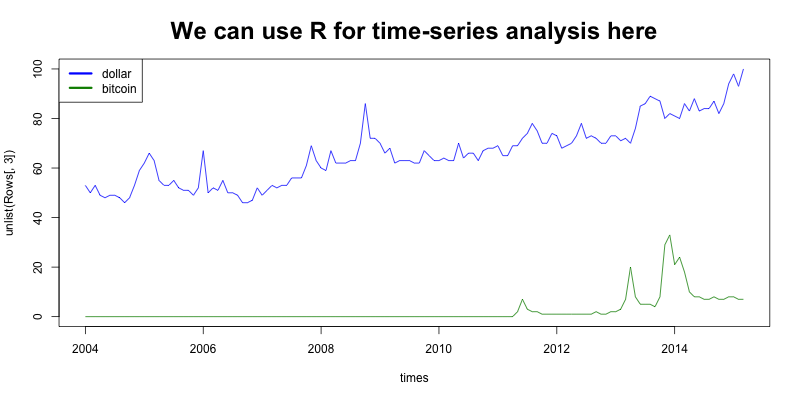

In [20]:
%%R -i rows,colnames -w 800 -h 400

# we need to use the '-i' form here to get all plots overlaid

Rows = t(rows)
nrows = nrow(Rows)
times = unlist(Rows[,1])+(unlist(Rows[,2])-1)/12
plot( times, unlist(Rows[,3]), col="blue", type="l", ylim=c(0,100),
    main="We can use R for time-series analysis here", cex.main=2)
points( times, unlist(Rows[,4]), col="green4", type="l")
legend("topleft", colnames[3:4], col=c("blue","green4"), lwd=3 )

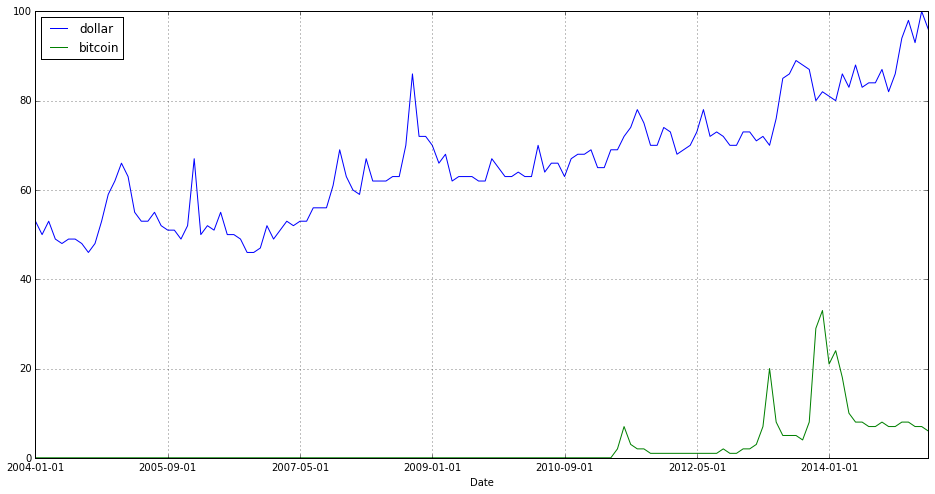

In [11]:
import pandas as pd

#  now do the same thing in Pandas/Matplotlib, instead of R

columns = [k['label'] for k in timeseries['table']['cols']]
simple_rows = map(lambda x: [k['v'] for k in x['c']], timeseries['table']['rows'])
dataframe = pd.DataFrame(simple_rows, columns=columns)
dataframe.set_index('Date', inplace=True)
dataframe.plot(figsize=(16, 8))


##Baby Names -- entirely within Python

At http://data.gov you can search over 100,000 datasets.  The API description at http://docs.ckan.org/en/latest/api/index.html is surprisingly good.

There are two complete Baby Names datasets (one with totals for the entire U.S., and another with totals by state) up through 2012 at http://catalog.data.gov/dataset?tags=baby-names

Chapters 2 and 3 of <i>Python for Data Analysis</i> (see above) show how to analyze the data using Python + Pandas.


In [57]:
import urllib2
zipped_data = urllib2.urlopen("http://www.ssa.gov/oact/babynames/names.zip")
## this .zip file unpacks into a collection of files with names for each year 1880 - 2012.

import zipfile
from cStringIO import StringIO

zfiledata = StringIO(zipped_data.read())
zfile = zipfile.ZipFile(zfiledata)
for filename in zfile.namelist():
   if filename.endswith(".txt"):
      # We have a .txt file within the .zip file
      filedata = zfile.open(filename).read()
      print 'baby name file %s -- has length %d' % (filename, len(filedata))
      
      # if you want to, you can manipulate the filedata for each file here
                        

baby name file yob1885.txt -- has length 28625
baby name file yob1886.txt -- has length 29822
baby name file yob1887.txt -- has length 29531
baby name file yob1888.txt -- has length 33064
baby name file yob1889.txt -- has length 32297
baby name file yob1890.txt -- has length 33621
baby name file yob1891.txt -- has length 33186
baby name file yob1892.txt -- has length 36542
baby name file yob1893.txt -- has length 35434
baby name file yob1894.txt -- has length 36817
baby name file yob1895.txt -- has length 38232
baby name file yob1896.txt -- has length 38747
baby name file yob1897.txt -- has length 37936
baby name file yob1898.txt -- has length 40925
baby name file yob1899.txt -- has length 38141
baby name file yob1900.txt -- has length 46884
baby name file yob1901.txt -- has length 39584
baby name file yob1902.txt -- has length 42284
baby name file yob1903.txt -- has length 42679
baby name file yob1904.txt -- has length 44819
baby name file yob1905.txt -- has length 46015
baby name fil

##Open Data

Open Data is a movement promoting open access to data, particularly in government and in the sciences.

See  http://en.wikipedia.org/wiki/Open_data, which includes links to related sites.

Some representative sites include:
<ul><li>
The US Government data clearinghouse http://www.data.gov
</li><li>
Google's Public Data Repository http://www.google.com/publicdata/directory
</li><li>
The World Bank data catalog http://datacatalog.worldbank.org/
</li><li>
The Guardian data site http://guardian.co.uk/data
</li></ul>


##Leading Newspaper open data sites

<ul><li>
Guardian.co.uk/data
<a target="_blank" title="http://www.guardian.co.uk/data" href="http://www.guardian.co.uk/data">http://www.guardian.co.uk/data</a>
<div class="p"><!----></div>
</li>

<li>
NY Times Labs
<a target="_blank" title="http://nytlabs.com" href="http://nytlabs.com">http://nytlabs.com</a>
<div class="p"><!----></div>
</li>

<li>
Los Angeles Times Data Desk
<a target="_blank" title="http://datadesk.latimes.com" href="http://datadesk.latimes.com">http://datadesk.latimes.com</a>
<div class="p"><!----></div>
</li>

</ul>

## Statistical Abstract of the United States

At http://catalog.data.gov/dataset/statistical-abstract-of-the-united-states you can find a collection of short aggregate datasets:

"First published in 1878, the Statistical Abstract serves as the official federal summary of statistics and provides over 1,400 tables of benchmark measures on the demographic, housing, social, political, and economic condition of the United States."

You can browse individual parts of this at http://www.census.gov/compendia/statab/ -- it seems some datasets only reach to 2009, and the datasets are in .xls format, but they cover a lot of territory.

In [ ]:
import requests
Higher_Education_Degrees_Awarded = "http://www.census.gov/compendia/statab/2012/tables/12s0303.xls"
degrees = requests.get(Higher_Education_Degrees_Awarded)


##US Census Data

The notebook at http://nbviewer.ipython.org/github/rdhyee/working-open-data-2014/blob/master/notebooks/Day_02_A_US_Census_API.ipynb
explains how to access Census data.

The other notebooks in Raymond Yee's Open Data course http://nbviewer.ipython.org/github/rdhyee/working-open-data-2014/tree/master/ are excellent also.

##CIA World Factbook

A well-known database of information about countries and their leaders is at
https://www.cia.gov/library/publications/the-world-factbook/

You can download the entire World Factbook as a zip file from:
https://www.cia.gov/library/publications/download/
(this page says it is 182MB).


##World Bank Data Catalog

The World Bank has a catalog of datasets at http://datacatalog.worldbank.org/ -- and have an API that permits download of datasets in a variety of formats at http://data.worldbank.org/developers/data-catalog-api

They also have an amazing number of indicators at http://data.worldbank.org/indicator -- with for example Science & Technology indicators at http://data.worldbank.org/topic/science-and-technology showing e.g. numbers of Patent Applications and total R&D Expenditures.

In [ ]:
Complete_XML_catalog_URL = "http://api.worldbank.org/v2/datacatalog/downloadfile"

Science_and_Technology_Indicators = "http://api.worldbank.org/v2/en/topic/14?downloadformat=csv"

##Other Government Data Sites

<ul><li>
Federal data clearinghouse
<a target="_blank" title="http://www.data.gov" href="http://www.data.gov">http://www.data.gov</a>
<div class="p"><!----></div>
</li>

<li>
National Bureau of Economic Research
<a target="_blank" title="http://www.nber.org/data" href="http://www.nber.org/data">http://www.nber.org/data</a>
<br />(many interesting datasets: Macroeconomics, industry, trade, demographics, hospital, patents, ...)
<div class="p"><!----></div>
</li>

<li>
Federal Reserve Data Economic Research &amp; Data
<a target="_blank" title="http://www.federalreserve.gov/econresdata/default.htm" href="http://www.federalreserve.gov/econresdata/default.htm">http://www.federalreserve.gov/econresdata/default.htm</a>
<br />(including data about mortgage defaults, interest rates, exchange rates, industrial production, ...)
<div class="p"><!----></div>
</li>

<li>
Federal Statistics Data Access Tools:
<a target="_blank" title="http://www.fedstats.gov/toolkit.html" href="http://www.fedstats.gov/toolkit.html">http://www.fedstats.gov/toolkit.html</a>
<div class="p"><!----></div>
</li>

<li>
The Federal Election Commission's <a target="_blank" title="https://github.com/rgbkrk/pydata-notebook/tree/master/ch09" href="https://github.com/rgbkrk/pydata-notebook/tree/master/ch09">2012 Campaign Contribution data</a>,
a 150 megabyte CSV file that includes contributor names, occupation and employer, address, and contribution amount.
(<a target="_blank" title="wakari.io" href="wakari.io">wakari.io</a> has a <a target="_blank" title="https://www.wakari.io/sharing/bundle/jbourque/Follow_the_Money" href="https://www.wakari.io/sharing/bundle/jbourque/Follow_the_Money">IPython Notebook that links this FEC data with Census data to obtain per-capita contributions by state</a></font>.)
<div class="p"><!----></div>
</li>

<li>
Tracking the U.S. Congress
<a target="_blank" title="http://www.govtrack.us/developers/data.xpd" href="http://www.govtrack.us/developers/data.xpd">http://www.govtrack.us/developers/data.xpd</a>
<div class="p"><!----></div>
</li>

<li>
California State Datasets
<a target="_blank" title="http://www.ca.gov/data/state_data_files.html" href="http://www.ca.gov/data/state_data_files.html">http://www.ca.gov/data/state_data_files.html</a>
<div class="p"><!----></div>
</li></ul>

##Kaggle competitions

Kaggle (http://www.kaggle.com/) is a site that both has datasets and runs competitions you can enter:
http://www.kaggle.com/competitions

A number of the datasets are very large and routinely used by researchers now.

##NFL (National Football League) Mining

Automated NFL team ranking:
http://nbviewer.ipython.org/github/seanjtaylor/NFLRanking/blob/master/NFL%20Rankings.ipynb



##Stanford Large Network Dataset Collection (SNAP)

The collection of datasets by Jure Leskovec at
http://snap.stanford.edu/data/ is well-known for researchers doing network analysis.

A Python interface (called "Snap.py) is available at http://snap.stanford.edu/snappy/index.html

## <i>Mining the Social Web (2nd Ed)</i>:  a how-to book with executable notebooks for Twitter, Facebook, etc.

A polished O'Reilly book (http://shop.oreilly.com/product/0636920030195.do about "Data Mining Facebook, Twitter, LinkedIn, Google+, GitHub, and More").

The main page at https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition has HTML versions of IPython notebooks for each chapter at the end.
The actual notebooks are at https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/tree/master/ipynb

At http://www.data.gov there is a dataset keeping track of social media activity:
http://catalog.data.gov/dataset/social-media-monitoring-metrics
"Lists basic social media metrics aggregated on a weekly basis. Metrics include SAMHSA's Facebook fans, comments, likes, and posts; and Twitter followers and mentions."

##Most Data Mining Publications include links to datasets now

It is common now for conferences and journals to require disclosure of datasets, so that the results claimed by authors can be tested for reproducibility.

This means that, if you are interested in a particular kind of research, you can easily find datasets by looking at recent publications in the area.

At http://www.sigkdd.org you can find publications from the KDD conference, which many see as the premier data mining conference.